In [36]:
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

font = {"family": "YuGothic"}
matplotlib.rc("font", **font)

In [37]:
client60 = pd.read_csv("../log-single-client60/nginx-minis2.csv")
client60 = client60.select_dtypes(include=['int', 'float'])
client60_h2_start = 1675340392 + 30
client60_h2_end = 1675342353 - 30
client60_h3_start = 1675342960 + 30
client60_h3_end = 1675345284 -30
client60.dtypes

Time         int64
UID          int64
PID          int64
%usr       float64
%system    float64
%guest     float64
%wait      float64
%CPU       float64
CPU          int64
dtype: object

In [38]:
def cpu_performance(df: pd.DataFrame, start: int, end: int):
    df_groupby = df[(start <= df["Time"]) & (df["Time"] <= end)].groupby("Time")
    df_groupby = df_groupby.sum()
    return df_groupby


In [39]:
client60_h2 = cpu_performance(client60, client60_h2_start, client60_h2_end)
des_h2 = client60_h2[[r"%usr", r"%system", r"%CPU"]].describe()
des_h2.to_csv("server-h2.csv")

,%usr,%system,%CPU
count,1902.000000,1902.000000,1902.000000
mean,11.062319,5.000131,16.062450
std,3.564572,1.972240,4.794644
min,1.000000,0.000000,1.000000
25%,9.000000,4.000000,13.000000
50%,11.000000,5.000000,16.000000
75%,13.000000,6.000000,19.000000
max,27.000000,15.840000,39.000000


In [40]:
client60_h3 = cpu_performance(client60, client60_h3_start, client60_h3_end)
des_h3 = client60_h3[[r"%usr", r"%system", r"%CPU"]].describe()
des_h3.to_csv("server-h2.csv")

,%usr,%system,%CPU
count,2264.000000,2264.000000,2264.000000
mean,28.935499,29.163366,58.098865
std,3.727589,3.704260,5.226097
min,15.000000,14.000000,39.000000
25%,26.932500,27.000000,55.000000
50%,29.000000,29.000000,58.000000
75%,31.000000,32.000000,61.000000
max,50.000000,45.000000,84.000000


In [41]:
result = pd.DataFrame()
result["HTTP/2"] = client60_h2[r"%CPU"].reset_index(drop=True)
result["HTTP/3"] = client60_h3[r"%CPU"].reset_index(drop=True)
result.to_csv("server-describe.csv", index=False)
result


,HTTP/2,HTTP/3
0,12.0,55.0
1,22.0,52.0
2,21.0,67.0
3,11.0,64.0
4,17.0,54.0
...,...,...
1897,14.0,64.0
1898,15.0,59.0
1899,25.0,57.0
1900,10.0,59.0


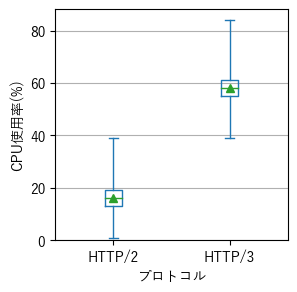

In [55]:
plot = result.plot.box(
    showmeans=True, xlabel="プロトコル", ylabel="CPU使用率(%)", figsize=(3, 3), whis=[0, 100]
)
plot.set_ylim(0)
plot.grid(which="major", axis="y")
